In [6]:
load("~/ma611-code/solid_angle.sage")

In [7]:
load("~/ma611-code/decomp.sage")

In [8]:
def plot_error_3d_wrt_deg_log(A, s, t, eps=1e-2, color="red"):
    logging.disable(logging.INFO)
    logging.disable(logging.WARNING)
    actual_measure=solid_angle_3d(A)
    print("Solid angle measure is: %s" % actual_measure)
    list=[]
    for i in range(s,t+1):
        sam_ij=solid_angle_measure(A, deg=10*i, eps=eps)
        error_ij=abs(sam_ij-actual_measure)
        list_ij=(10*i, error_ij)
        print(list_ij)
        list.append(list_ij)
    return list_plot_semilogy(list, axes_labels=['$deg$', '$error$'], color=color) 

In [9]:
def plot_error_3d_wrt_criticaldeg_and_criticaleps(A, T, color="red"):
    logging.disable(logging.INFO)
    logging.disable(logging.WARNING)
    actual_measure=solid_angle_3d(A)
    print("Solid angle measure is: %s" % actual_measure)
    list=[]
    for (i,j) in T:
        sam_ij=solid_angle_measure(A, deg=j, eps=i)
        error_ij=abs(sam_ij-actual_measure)
        list_ij=(i, error_ij)
        print(j, list_ij)
        list.append(list_ij)
    return list_plot(list, scale='loglog', axes_labels=['$eps$', '$error-wrt-critical-deg$'], color=color) 

In [10]:
def line_of_best_fit_for_eps_deg_pairs(T):
    logging.disable(logging.INFO)
    logging.disable(logging.WARNING)
    list=[]
    for (i,j) in T:
        list_ij=[log(i,10), log(j, 10)]
        print(list_ij)
        list.append(list_ij)
    var('m,b')
    model(x)=m*x+b
    return(find_fit(list, model))

In [11]:
def best_fit_for_eps_deg_pairs(T):
    logging.disable(logging.INFO)
    logging.disable(logging.WARNING)
    list=[]
    for (i,j) in T:
        list_ij=[log(i,10), j]
        print(list_ij)
        list.append(list_ij)
    var('m,b')
    model(x)=m*x+b
    return(find_fit(list, model))

In [12]:
def best_fit_for_deg_eps_pairs(TR):
    logging.disable(logging.INFO)
    logging.disable(logging.WARNING)
    list=[]
    for (i,j) in T:
        list_ij=[log(i,10), log(j, 10)]
        print(list_ij)
        list.append(list_ij)
    var('m,b')
    model(x)=m*x+b
    return(find_fit(list, model))

In [13]:
def line_of_best_fit_for_error(A, T):
    logging.disable(logging.INFO)
    logging.disable(logging.WARNING)
    actual_measure=solid_angle_3d(A)
    print("Solid angle measure is: %s" % actual_measure)
    list=[]
    for (i,j) in T:
        sam_ij=solid_angle_measure(A, deg=j, eps=i)
        error_ij=abs(sam_ij-actual_measure)
        list_ij=[log(i,10), log(error_ij, 10)]
        print(list_ij)
        list.append(list_ij)
    var('m,b')
    model(x)=m*x+b
    return(find_fit(list, model))

In [45]:
def line_of_best_fit_deg_delta(L, color="pink"):
    list=[]
    for (i,j) in L:
        list_ij=[log(i,10), j]
        print(list_ij)
        list.append(list_ij)
    var('m,b')
    model(x)=m*x+b
    print(find_fit(list, model))
    return list_plot(list, axes_labels=['$log(error)$', '$truncation-deg$'], color=color) 

In [16]:
def min_eigenval_assoc_matrix(A):
    d = A.nrows()
    M_exact = A * A.transpose()  # unnormalized matrix with diag entries not 1
    vnorm = [A[i].norm() for i in range(d)]
    M = matrix(RDF, d)
    for i in range(d):
        for j in range(d):
            if i != j:
                M_exact[i, j] = - abs(M_exact[i, j])
            M[i, j] = RDF(M_exact[i, j] / (vnorm[i] * vnorm[j]))
    return min(M.eigenvalues())

In the following, we start at 1e-2 and lower

In [53]:
A = matrix([[1,-1,0],[2,1,1],[-1,0,0]])
C = list(generate_cones_decomposition(A)) 

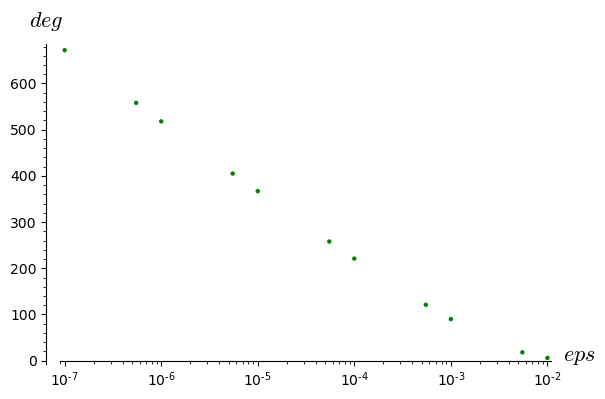

In [14]:
#C[0][0] log scale
T=[(1e-2,6), (5.5e-3,18), (1e-3,90), (5.5e-4, 121), (1e-4,221), (5.5e-5,258), (1e-5,367), (5.5e-6, 405), (1e-6,518), (5.5e-7, 558),(1e-7,672)]
list_plot_semilogx(T, axes_labels=['$eps$', '$deg$'], color="green") 

Solid angle measure is: 0.011865046884419285
6 (0.0100000000000000, 0.0044951818710202915)
18 (0.00550000000000000, 0.0026556990502708475)
90 (0.00100000000000000, 0.0004859691733563685)
121 (0.000550000000000000, 0.00027167459203392315)
221 (0.000100000000000000, 4.9265049200492364e-05)
258 (0.0000550000000000000, 2.708509734283826e-05)
367 (0.0000100000000000000, 4.894182917658529e-06)
405 (5.50000000000000e-6, 2.7282659510827895e-06)
518 (1.00000000000000e-6, 4.91269524109661e-07)
558 (5.50000000000000e-7, 2.694688757149538e-07)
672 (1.00000000000000e-7, 4.929958527868927e-08)


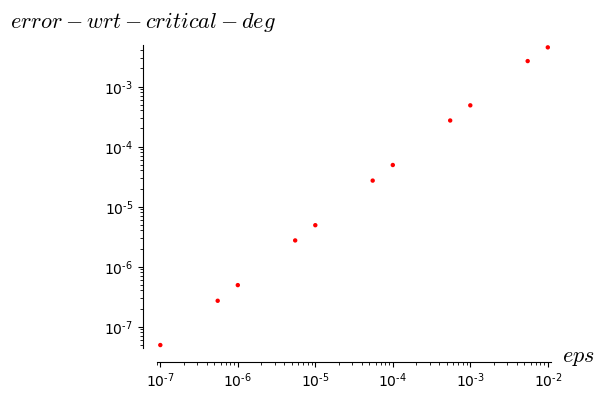

In [16]:
T=[(1e-2,6), (5.5e-3,18), (1e-3,90), (5.5e-4, 121), (1e-4,221), (5.5e-5,258), (1e-5,367), (5.5e-6, 405), (1e-6,518), (5.5e-7, 558),(1e-7,672)]
plot_error_3d_wrt_criticaldeg_and_criticaleps(C[0][0], T, color="red")

In [17]:
T=[(1e-2,6), (5.5e-3,18), (1e-3,90), (5.5e-4, 121), (1e-4,221), (5.5e-5,258), (1e-5,367), (5.5e-6, 405), (1e-6,518), (5.5e-7, 558),(1e-7,672)]
line_of_best_fit_for_error(C[0][0], T)

Solid angle measure is: 0.011865046884419285
[-2.00000000000000, -2.347252732410693]
[-2.25963731050576, -2.5758211417332646]
[-3.00000000000000, -3.3133912786097914]
[-3.25963731050576, -3.5659509764346744]
[-4.00000000000000, -4.307461079148654]
[-4.25963731050576, -4.567269599235665]
[-5.00000000000000, -5.310319803140093]
[-5.25963731050576, -5.564113296970833]
[-6.00000000000000, -6.3086801764748435]
[-6.25963731050576, -6.569491389608401]
[-7.00000000000000, -7.307156734108862]


[b == -0.33101139216123454, m == 0.9958092907178883]

In [18]:
1-min_eigenval_assoc_matrix(C[0][0])

0.9860132971832694

In [19]:
min_eigenval_assoc_matrix(C[0][0])

0.013986702816730645

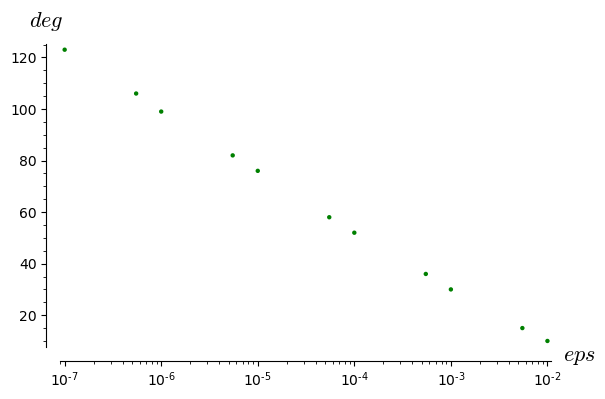

In [19]:
#C[1][0] log scale
T=[(1e-2,10), (5.5e-3,15), (1e-3,30), (5.5e-4, 36), (1e-4,52), (5.5e-5,58), (1e-5,76), (5.5e-6, 82), (1e-6,99), (5.5e-7, 106),(1e-7,123)]
list_plot_semilogx(T, axes_labels=['$eps$', '$deg$'], color="green") 

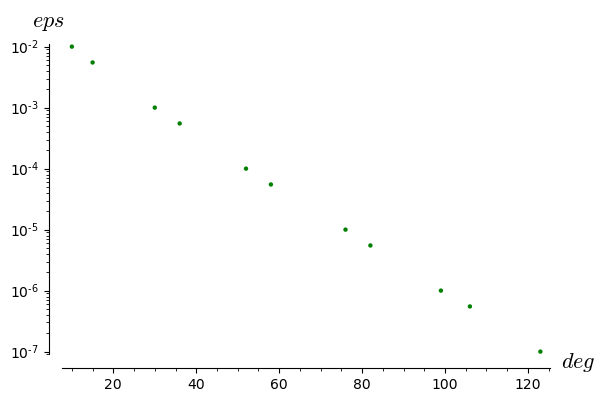

In [2]:
TR=[(10,1e-2), (15,5.5e-3), (30,1e-3), (36,5.5e-4), (52,1e-4), (58,5.5e-5), (76,1e-5), (82,5.5e-6), (99,1e-6), (106,5.5e-7),(123,1e-7)]
list_plot_semilogy(TR, axes_labels=['$deg$', '$eps$'], color="green") 

In [20]:
T=[(1e-2,10), (5.5e-3,15), (1e-3,30), (5.5e-4, 36), (1e-4,52), (5.5e-5,58), (1e-5,76), (5.5e-6, 82), (1e-6,99), (5.5e-7, 106),(1e-7,123)]
line_of_best_fit_for_eps_deg_pairs(T)

[-2.00000000000000, 1]
[-2.25963731050576, log(15)/log(10)]
[-3.00000000000000, log(30)/log(10)]
[-3.25963731050576, 2*log(6)/log(10)]
[-4.00000000000000, log(52)/log(10)]
[-4.25963731050576, log(58)/log(10)]
[-5.00000000000000, log(76)/log(10)]
[-5.25963731050576, log(82)/log(10)]
[-6.00000000000000, log(99)/log(10)]
[-6.25963731050576, log(106)/log(10)]
[-7.00000000000000, log(123)/log(10)]


[b == 0.7942394015924286, m == -0.2041026228342096]

Solid angle measure is: 0.34685501432950744
10 (0.0100000000000000, 0.07813628937619288)
15 (0.00550000000000000, 0.043794253151027085)
30 (0.00100000000000000, 0.00871942793179964)
36 (0.000550000000000000, 0.004699177985445058)
52 (0.000100000000000000, 0.0009403041523317612)
58 (0.0000550000000000000, 0.0005195762094861722)
76 (0.0000100000000000000, 8.956641719082281e-05)
82 (5.50000000000000e-6, 5.0121201068842325e-05)
99 (1.00000000000000e-6, 9.780437363104966e-06)
106 (5.50000000000000e-7, 5.0094321594196245e-06)
123 (1.00000000000000e-7, 9.936545097288807e-07)


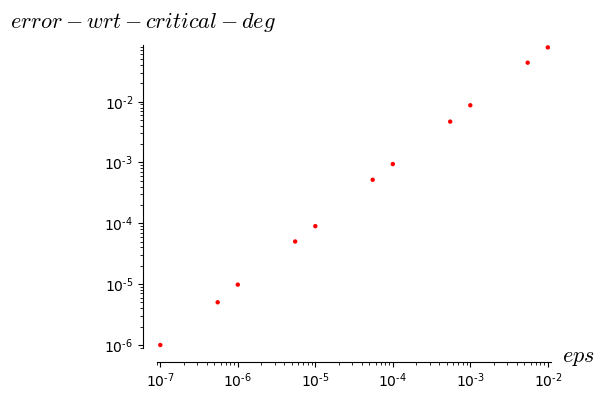

In [21]:
T=[(1e-2,10), (5.5e-3,15), (1e-3,30), (5.5e-4, 36), (1e-4,52), (5.5e-5,58), (1e-5,76), (5.5e-6, 82), (1e-6,99), (5.5e-7, 106),(1e-7,123)]
plot_error_3d_wrt_criticaldeg_and_criticaleps(C[1][0], T, color="red")

In [22]:
T=[(1e-2,10), (5.5e-3,15), (1e-3,30), (5.5e-4, 36), (1e-4,52), (5.5e-5,58), (1e-5,76), (5.5e-6, 82), (1e-6,99), (5.5e-7, 106),(1e-7,123)]
line_of_best_fit_for_error(C[1][0], T)

Solid angle measure is: 0.34685501432950744
[-2.00000000000000, -1.107147216885328]
[-2.25963731050576, -1.3585828755357618]
[-3.00000000000000, -2.059512007523005]
[-3.25963731050576, -2.3279781053850575]
[-4.00000000000000, -3.026731646066533]
[-4.25963731050576, -3.2843507427518537]
[-5.00000000000000, -4.047854797956757]
[-5.25963731050576, -4.299978530428871]
[-6.00000000000000, -5.009641723930595]
[-6.25963731050576, -5.300211500481513]
[-7.00000000000000, -6.002764592061699]


[b == 0.8762442054060324, m == 0.9827168137175772]

In [23]:
1-min_eigenval_assoc_matrix(C[1][0])

0.9128709291752769

In [20]:
min_eigenval_assoc_matrix(C[1][0])

0.0871290708247231

In [54]:
Z_1=matrix([[-1,-1,-1],[2,2,1],[2,1,1]])
Z=list(generate_cones_decomposition(Z_1))

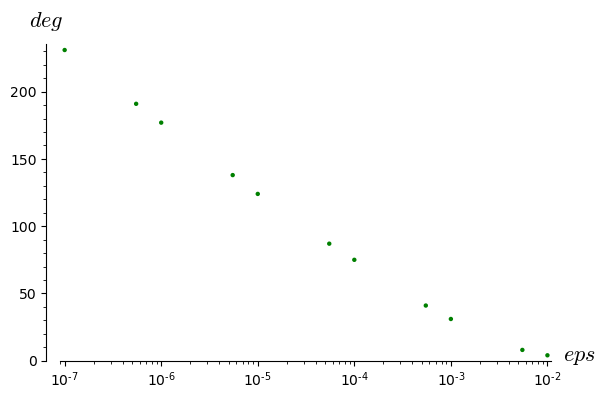

In [25]:
#Z[0][0] log scale
T=[(1e-2,4), (5.5e-3,8), (1e-3,31), (5.5e-4, 41), (1e-4,75), (5.5e-5,87), (1e-5,124), (5.5e-6, 138), (1e-6,177), (5.5e-7, 191),(1e-7,231)]
list_plot_semilogx(T, axes_labels=['$eps$', '$deg$'], color="green") 

In [26]:
T=[(1e-2,4), (5.5e-3,8), (1e-3,31), (5.5e-4, 41), (1e-4,75), (5.5e-5,87), (1e-5,124), (5.5e-6, 138), (1e-6,177), (5.5e-7, 191),(1e-7,231)]
line_of_best_fit_for_eps_deg_pairs(T)

[-2.00000000000000, 2*log(2)/log(10)]
[-2.25963731050576, 3*log(2)/log(10)]
[-3.00000000000000, log(31)/log(10)]
[-3.25963731050576, log(41)/log(10)]
[-4.00000000000000, log(75)/log(10)]
[-4.25963731050576, log(87)/log(10)]
[-5.00000000000000, log(124)/log(10)]
[-5.25963731050576, log(138)/log(10)]
[-6.00000000000000, log(177)/log(10)]
[-6.25963731050576, log(191)/log(10)]
[-7.00000000000000, log(231)/log(10)]


[b == 0.35904992868606705, m == -0.3229985906984636]

Solid angle measure is: 0.1770767061012525
4 (0.0100000000000000, 0.09431571072836756)
8 (0.00550000000000000, 0.06888698690880107)
31 (0.00100000000000000, 0.01742051974887901)
41 (0.000550000000000000, 0.010370404249616605)
75 (0.000100000000000000, 0.002015784096776718)
87 (0.0000550000000000000, 0.001161599426786064)
124 (0.0000100000000000000, 0.00022296753038894557)
138 (5.50000000000000e-6, 0.00012105859622937865)
177 (1.00000000000000e-6, 2.268572203045771e-05)
191 (5.50000000000000e-7, 1.2530400169741274e-05)
231 (1.00000000000000e-7, 2.336311630268817e-06)


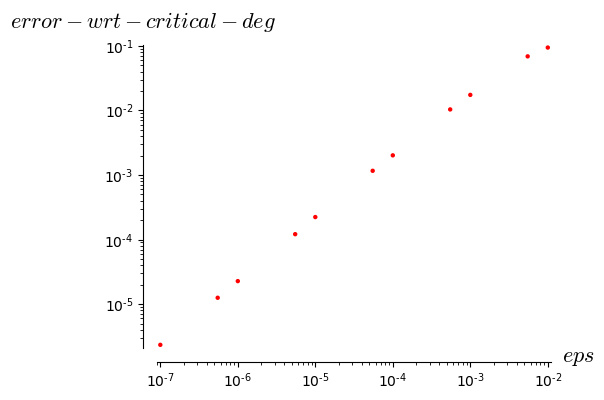

In [27]:
T=[(1e-2,4), (5.5e-3,8), (1e-3,31), (5.5e-4, 41), (1e-4,75), (5.5e-5,87), (1e-5,124), (5.5e-6, 138), (1e-6,177), (5.5e-7, 191),(1e-7,231)]
plot_error_3d_wrt_criticaldeg_and_criticaleps(Z[0][0], T, color="red")

In [28]:
T=[(1e-2,4), (5.5e-3,8), (1e-3,31), (5.5e-4, 41), (1e-4,75), (5.5e-5,87), (1e-5,124), (5.5e-6, 138), (1e-6,177), (5.5e-7, 191),(1e-7,231)]
line_of_best_fit_for_error(Z[0][0], T)

Solid angle measure is: 0.1770767061012525
[-2.00000000000000, -1.0254159582242364]
[-2.25963731050576, -1.1618628107116191]
[-3.00000000000000, -1.7589388917679185]
[-3.25963731050576, -1.9842043140105796]
[-4.00000000000000, -2.695555985420838]
[-4.25963731050576, -2.934943610955027]
[-5.00000000000000, -3.6517583764119994]
[-5.25963731050576, -3.9170043663838943]
[-6.00000000000000, -4.64424739365812]
[-6.25963731050576, -4.90203505919457]
[-7.00000000000000, -5.631469229076939]


[b == 0.9930583116430183, m == 0.9364963914358774]

In [29]:
1-min_eigenval_assoc_matrix(Z[0][0])

0.9663655798208228

In [23]:
min_eigenval_assoc_matrix(Z[0][0])

0.03363442017917717

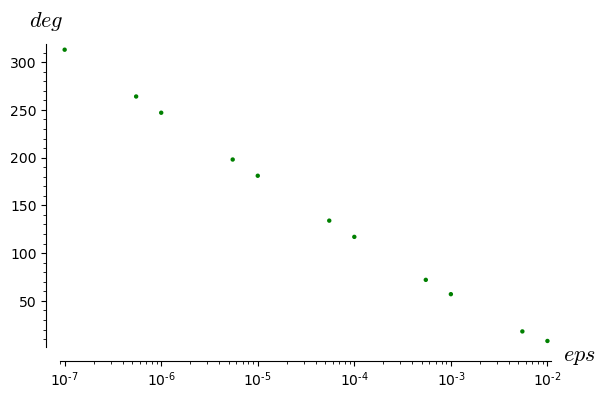

In [30]:
#Z[1][0] log scale
T=[(1e-2,8), (5.5e-3,18), (1e-3,57), (5.5e-4, 72), (1e-4,117), (5.5e-5,134), (1e-5,181), (5.5e-6, 198), (1e-6,247), (5.5e-7, 264),(1e-7,313)]
list_plot_semilogx(T, axes_labels=['$eps$', '$deg$'], color="green") 

In [31]:
T=[(1e-2,8), (5.5e-3,18), (1e-3,57), (5.5e-4, 72), (1e-4,117), (5.5e-5,134), (1e-5,181), (5.5e-6, 198), (1e-6,247), (5.5e-7, 264),(1e-7,313)]
line_of_best_fit_for_eps_deg_pairs(T)

[-2.00000000000000, 3*log(2)/log(10)]
[-2.25963731050576, log(18)/log(10)]
[-3.00000000000000, log(57)/log(10)]
[-3.25963731050576, log(72)/log(10)]
[-4.00000000000000, log(117)/log(10)]
[-4.25963731050576, log(134)/log(10)]
[-5.00000000000000, log(181)/log(10)]
[-5.25963731050576, log(198)/log(10)]
[-6.00000000000000, log(247)/log(10)]
[-6.25963731050576, log(264)/log(10)]
[-7.00000000000000, log(313)/log(10)]


[b == 0.7471941541606907, m == -0.28183074278668435]

Solid angle measure is: 0.3405023579158556
8 (0.0100000000000000, 0.19145948561877882)
18 (0.00550000000000000, 0.12060036018220377)
57 (0.00100000000000000, 0.024980307181661943)
72 (0.000550000000000000, 0.014123668156709679)
117 (0.000100000000000000, 0.0026901552608099566)
134 (0.0000550000000000000, 0.0014577684724815243)
181 (0.0000100000000000000, 0.000274751807560758)
198 (5.50000000000000e-6, 0.00015128243268058839)
247 (1.00000000000000e-6, 2.748915435368815e-05)
264 (5.50000000000000e-7, 1.527483162633292e-05)
313 (1.00000000000000e-7, 2.8335071196039507e-06)


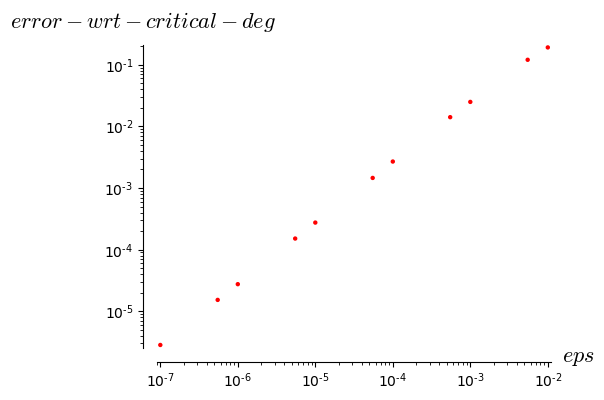

In [32]:
T=[(1e-2,8), (5.5e-3,18), (1e-3,57), (5.5e-4, 72), (1e-4,117), (5.5e-5,134), (1e-5,181), (5.5e-6, 198), (1e-6,247), (5.5e-7, 264),(1e-7,313)]
plot_error_3d_wrt_criticaldeg_and_criticaleps(Z[1][0], T, color="red")

In [33]:
T=[(1e-2,8), (5.5e-3,18), (1e-3,57), (5.5e-4, 72), (1e-4,117), (5.5e-5,134), (1e-5,181), (5.5e-6, 198), (1e-6,247), (5.5e-7, 264),(1e-7,313)]
line_of_best_fit_for_error(Z[1][0], T)

Solid angle measure is: 0.3405023579158556
[-2.00000000000000, -0.7179231122108226]
[-2.25963731050576, -0.9186513951402291]
[-3.00000000000000, -1.6024022254302392]
[-3.25963731050576, -1.8500524949749055]
[-4.00000000000000, -2.5702226542105393]
[-4.25963731050576, -2.8363114465997916]
[-5.00000000000000, -3.5610594417212846]
[-5.25963731050576, -3.820211500482019]
[-6.00000000000000, -4.560838620111999]
[-6.25963731050576, -4.816023568264297]
[-7.00000000000000, -5.547675691792266]


[b == 1.293778704748273, m == 0.9738033921907925]

In [34]:
1-min_eigenval_assoc_matrix(Z[1][0])

0.9677334015667414

In [55]:
B=matrix([[0,1,-2],[1,0,17],[39/34, -1, -1/2]])

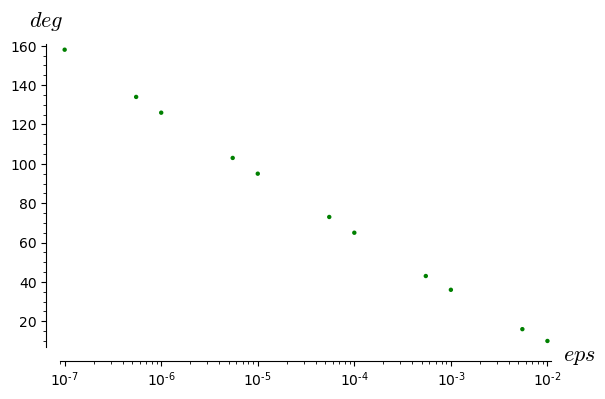

In [36]:
#B log scale
T=[(1e-2,10), (5.5e-3,16), (1e-3,36), (5.5e-4, 43), (1e-4,65), (5.5e-5,73), (1e-5,95), (5.5e-6, 103), (1e-6,126), (5.5e-7, 134),(1e-7,158)]
list_plot_semilogx(T, axes_labels=['$eps$', '$deg$'], color="green") 

In [37]:
T=[(1e-2,10), (5.5e-3,16), (1e-3,36), (5.5e-4, 43), (1e-4,65), (5.5e-5,73), (1e-5,95), (5.5e-6, 103), (1e-6,126), (5.5e-7, 134),(1e-7,158)]
line_of_best_fit_for_eps_deg_pairs(T)

[-2.00000000000000, 1]
[-2.25963731050576, 4*log(2)/log(10)]
[-3.00000000000000, 2*log(6)/log(10)]
[-3.25963731050576, log(43)/log(10)]
[-4.00000000000000, log(65)/log(10)]
[-4.25963731050576, log(73)/log(10)]
[-5.00000000000000, log(95)/log(10)]
[-5.25963731050576, log(103)/log(10)]
[-6.00000000000000, log(126)/log(10)]
[-6.25963731050576, log(134)/log(10)]
[-7.00000000000000, log(158)/log(10)]


[b == 0.7992374675949845, m == -0.22144119791557348]

Solid angle measure is: 0.3173484614153834
10 (0.0100000000000000, 0.09733270598067831)
16 (0.00550000000000000, 0.05774637299198643)
36 (0.00100000000000000, 0.011326662596282289)
43 (0.000550000000000000, 0.006536873164228463)
65 (0.000100000000000000, 0.0012051703299607586)
73 (0.0000550000000000000, 0.0006581684103082464)
95 (0.0000100000000000000, 0.00012705160156306627)
103 (5.50000000000000e-6, 7.023239780645785e-05)
126 (1.00000000000000e-6, 1.2928123523658908e-05)
134 (5.50000000000000e-7, 7.20040125795629e-06)
158 (1.00000000000000e-7, 1.2542394773329413e-06)


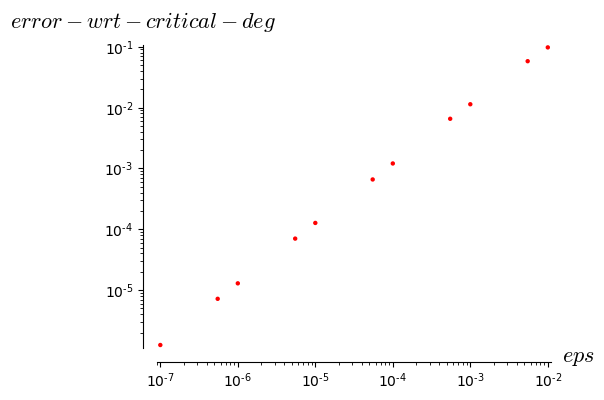

In [38]:
T=[(1e-2,10), (5.5e-3,16), (1e-3,36), (5.5e-4, 43), (1e-4,65), (5.5e-5,73), (1e-5,95), (5.5e-6, 103), (1e-6,126), (5.5e-7, 134),(1e-7,158)]
plot_error_3d_wrt_criticaldeg_and_criticaleps(B, T, color="red")

In [39]:
T=[(1e-2,10), (5.5e-3,16), (1e-3,36), (5.5e-4, 43), (1e-4,65), (5.5e-5,73), (1e-5,95), (5.5e-6, 103), (1e-6,126), (5.5e-7, 134),(1e-7,158)]
line_of_best_fit_for_error(B, T)

Solid angle measure is: 0.3173484614153834
[-2.00000000000000, -1.0117412024836514]
[-2.25963731050576, -1.238475288302196]
[-3.00000000000000, -1.945898036256011]
[-3.25963731050576, -2.184629941622744]
[-4.00000000000000, -2.918951568745223]
[-4.25963731050576, -3.181662966098231]
[-5.00000000000000, -3.896019856031808]
[-5.25963731050576, -4.153462504069308]
[-6.00000000000000, -4.88846450701912]
[-6.25963731050576, -5.142643300893658]
[-7.00000000000000, -5.901619533876379]


[b == 0.9819810808912045, m == 0.9786156369231864]

In [40]:
1-min_eigenval_assoc_matrix(B)

0.932686425933875

In [87]:
solid_angle_3d(B)

0.3173484614153834

In [88]:
min_eigenval_assoc_matrix(B)

0.06731357406612504

In [56]:
F=matrix([[6,1,0],[0,1,-2],[1,1,1]])

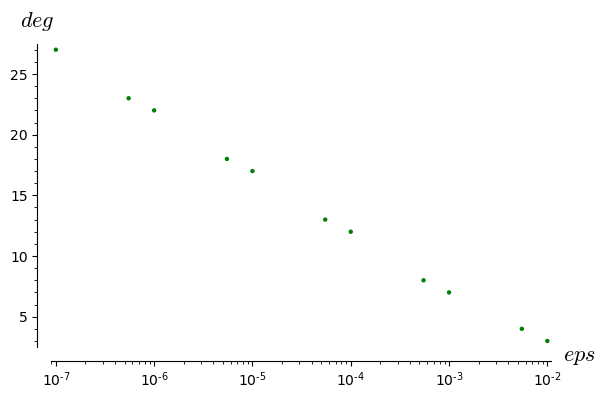

In [42]:
#F log scale
T=[(1e-2,3), (5.5e-3,4), (1e-3,7), (5.5e-4, 8), (1e-4,12), (5.5e-5,13), (1e-5,17), (5.5e-6, 18), (1e-6,22), (5.5e-7, 23),(1e-7,27)]
list_plot_semilogx(T, axes_labels=['$eps$', '$deg$'], color="green") 

In [43]:
T=[(1e-2,3), (5.5e-3,4), (1e-3,7), (5.5e-4, 8), (1e-4,12), (5.5e-5,13), (1e-5,17), (5.5e-6, 18), (1e-6,22), (5.5e-7, 23),(1e-7,27)]
line_of_best_fit_for_eps_deg_pairs(T)

[-2.00000000000000, log(3)/log(10)]
[-2.25963731050576, 2*log(2)/log(10)]
[-3.00000000000000, log(7)/log(10)]
[-3.25963731050576, 3*log(2)/log(10)]
[-4.00000000000000, log(12)/log(10)]
[-4.25963731050576, log(13)/log(10)]
[-5.00000000000000, log(17)/log(10)]
[-5.25963731050576, log(18)/log(10)]
[-6.00000000000000, log(22)/log(10)]
[-6.25963731050576, log(23)/log(10)]
[-7.00000000000000, 3*log(3)/log(10)]


[b == 0.24994717138903402, m == -0.18411272405874432]

Solid angle measure is: 0.0684833121625528
3 (0.0100000000000000, 0.002638294975950556)
4 (0.00550000000000000, 0.0014974187477617001)
7 (0.00100000000000000, 0.00031843176449347643)
8 (0.000550000000000000, 0.00019436173271854262)
12 (0.000100000000000000, 2.8850681799127975e-05)
13 (0.0000550000000000000, 1.811878809372669e-05)
17 (0.0000100000000000000, 2.9062953777331257e-06)
18 (5.50000000000000e-6, 1.8504385214529462e-06)
22 (1.00000000000000e-6, 3.0957103329398716e-07)
23 (5.50000000000000e-7, 1.9872430555289977e-07)
27 (1.00000000000000e-7, 3.414326014972158e-08)


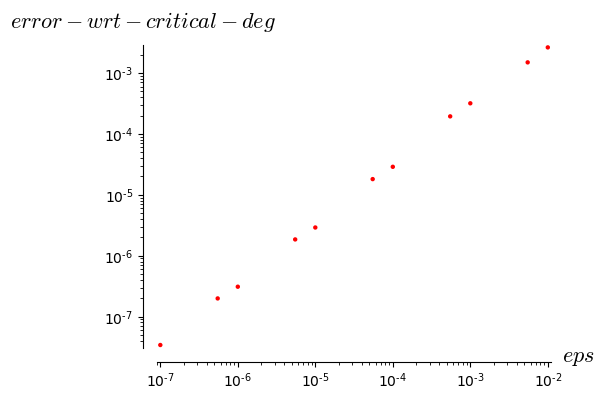

In [44]:
T=[(1e-2,3), (5.5e-3,4), (1e-3,7), (5.5e-4, 8), (1e-4,12), (5.5e-5,13), (1e-5,17), (5.5e-6, 18), (1e-6,22), (5.5e-7, 23),(1e-7,27)]
plot_error_3d_wrt_criticaldeg_and_criticaleps(F, T, color="red")

In [45]:
T=[(1e-2,3), (5.5e-3,4), (1e-3,7), (5.5e-4, 8), (1e-4,12), (5.5e-5,13), (1e-5,17), (5.5e-6, 18), (1e-6,22), (5.5e-7, 23),(1e-7,27)]
line_of_best_fit_for_error(F, T)

Solid angle measure is: 0.0684833121625528
[-2.00000000000000, -2.578676649553167]
[-2.25963731050576, -2.8246567337841215]
[-3.00000000000000, -3.4969836166373787]
[-3.25963731050576, -3.7113892378928988]
[-4.00000000000000, -4.539843919142555]
[-4.25963731050576, -4.741870854220394]
[-5.00000000000000, -5.536660248812767]
[-5.25963731050576, -5.732725339229917]
[-6.00000000000000, -6.509239683225332]
[-6.25963731050576, -6.701749011994609]
[-7.00000000000000, -7.466695012880465]


[b == -0.5772531220300128, m == 0.9832813476802715]

In [46]:
1-min_eigenval_assoc_matrix(F)

0.7400010849528684

In [85]:
solid_angle_3d(F)

0.0684833121625528

In [86]:
min_eigenval_assoc_matrix(F)

0.2599989150471316

In [57]:
X=matrix([[-1,-2,1],[1,0,2],[0,2,0]])

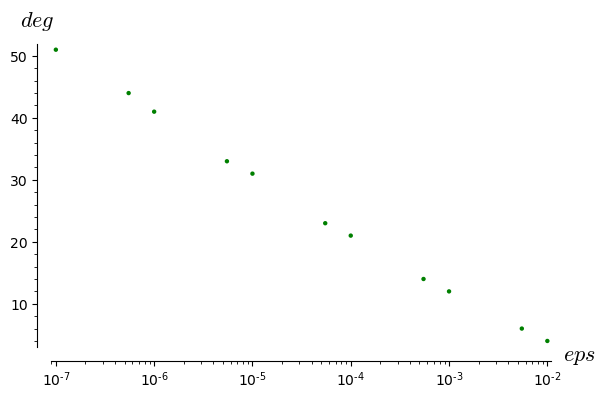

In [48]:
#X log scale
T=[(1e-2,4), (5.5e-3,6), (1e-3, 12), (5.5e-4, 14), (1e-4,21), (5.5e-5,23), (1e-5,31), (5.5e-6, 33), (1e-6,41), (5.5e-7, 44),(1e-7,51)]
list_plot_semilogx(T, axes_labels=['$eps$', '$deg$'], color="green") 

In [49]:
T=[(1e-2,4), (5.5e-3,6), (1e-3, 12), (5.5e-4, 14), (1e-4,21), (5.5e-5,23), (1e-5,31), (5.5e-6, 33), (1e-6,41), (5.5e-7, 44),(1e-7,51)]
line_of_best_fit_for_eps_deg_pairs(T)

[-2.00000000000000, 2*log(2)/log(10)]
[-2.25963731050576, log(6)/log(10)]
[-3.00000000000000, log(12)/log(10)]
[-3.25963731050576, log(14)/log(10)]
[-4.00000000000000, log(21)/log(10)]
[-4.25963731050576, log(23)/log(10)]
[-5.00000000000000, log(31)/log(10)]
[-5.25963731050576, log(33)/log(10)]
[-6.00000000000000, log(41)/log(10)]
[-6.25963731050576, log(44)/log(10)]
[-7.00000000000000, log(51)/log(10)]


[b == 0.3821933192011583, m == -0.20826917524948416]

Solid angle measure is: 0.15622969354691618
4 (0.0100000000000000, 0.023115121423523843)
6 (0.00550000000000000, 0.01315969518260876)
12 (0.00100000000000000, 0.002789260640718938)
14 (0.000550000000000000, 0.0017068698815881078)
21 (0.000100000000000000, 0.0003234877348721743)
23 (0.0000550000000000000, 0.00020341887127145464)
31 (0.0000100000000000000, 3.287324817605186e-05)
33 (5.50000000000000e-6, 2.0977320623311035e-05)
41 (1.00000000000000e-6, 3.544084167528272e-06)
44 (5.50000000000000e-7, 1.830888026438382e-06)
51 (1.00000000000000e-7, 3.962092341713852e-07)


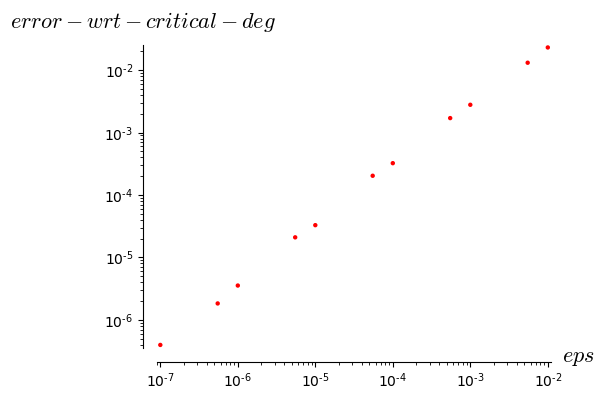

In [50]:
T=[(1e-2,4), (5.5e-3,6), (1e-3, 12), (5.5e-4, 14), (1e-4,21), (5.5e-5,23), (1e-5,31), (5.5e-6, 33), (1e-6,41), (5.5e-7, 44),(1e-7,51)]
plot_error_3d_wrt_criticaldeg_and_criticaleps(X, T, color="red")

In [51]:
T=[(1e-2,4), (5.5e-3,6), (1e-3, 12), (5.5e-4, 14), (1e-4,21), (5.5e-5,23), (1e-5,31), (5.5e-6, 33), (1e-6,41), (5.5e-7, 44),(1e-7,51)]
line_of_best_fit_for_error(X, T)

Solid angle measure is: 0.15622969354691618
[-2.00000000000000, -1.6361038208749206]
[-2.25963731050576, -1.8807541701479105]
[-3.00000000000000, -2.5545109014610494]
[-3.25963731050576, -2.76779958483849]
[-4.00000000000000, -3.4901421810797144]
[-4.25963731050576, -3.6916087598258183]
[-5.00000000000000, -4.483157381551475]
[-5.25963731050576, -4.6782499838651495]
[-6.00000000000000, -5.450495972716411]
[-6.25963731050576, -5.737338215494558]
[-7.00000000000000, -6.402075406881913]


[b == 0.32557045789708355, m == 0.9597360628499284]

In [52]:
1-min_eigenval_assoc_matrix(X)

0.8366600265340756

In [83]:
solid_angle_3d(X)

0.15622969354691618

In [84]:
min_eigenval_assoc_matrix(X)

0.16333997346592444

In [58]:
A=matrix([[13,4,-10],[1,-12,0],[0,-4,-2]])

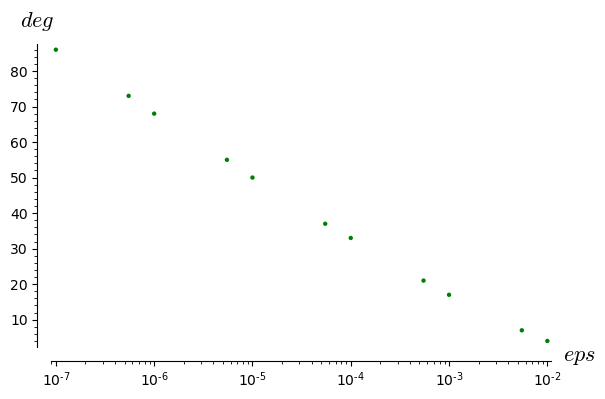

In [54]:
#A log scale
T=[(1e-2,4), (5.5e-3,7), (1e-3,17), (5.5e-4, 21), (1e-4,33), (5.5e-5,37), (1e-5,50), (5.5e-6, 55), (1e-6,68), (5.5e-7, 73),(1e-7,86)]
list_plot_semilogx(T, axes_labels=['$eps$', '$deg$'], color="green") 

In [55]:
T=[(1e-2,4), (5.5e-3,7), (1e-3,17), (5.5e-4, 21), (1e-4,33), (5.5e-5,37), (1e-5,50), (5.5e-6, 55), (1e-6,68), (5.5e-7, 73),(1e-7,86)]
line_of_best_fit_for_eps_deg_pairs(T)

[-2.00000000000000, 2*log(2)/log(10)]
[-2.25963731050576, log(7)/log(10)]
[-3.00000000000000, log(17)/log(10)]
[-3.25963731050576, log(21)/log(10)]
[-4.00000000000000, log(33)/log(10)]
[-4.25963731050576, log(37)/log(10)]
[-5.00000000000000, log(50)/log(10)]
[-5.25963731050576, log(55)/log(10)]
[-6.00000000000000, log(68)/log(10)]
[-6.25963731050576, log(73)/log(10)]
[-7.00000000000000, log(86)/log(10)]


[b == 0.39237994657578956, m == -0.2451443058651694]

Solid angle measure is: 0.03498847667580621
4 (0.0100000000000000, 0.004166174108166797)
7 (0.00550000000000000, 0.002219917501036013)
17 (0.00100000000000000, 0.0004156476991294955)
21 (0.000550000000000000, 0.00022879160592614162)
33 (0.000100000000000000, 4.231775091434464e-05)
37 (0.0000550000000000000, 2.463688987981716e-05)
50 (0.0000100000000000000, 4.438128640538164e-06)
55 (5.50000000000000e-6, 2.3259320956064977e-06)
68 (1.00000000000000e-6, 4.438554036811926e-07)
73 (5.50000000000000e-7, 2.3641570155025216e-07)
86 (1.00000000000000e-7, 4.661723387866523e-08)


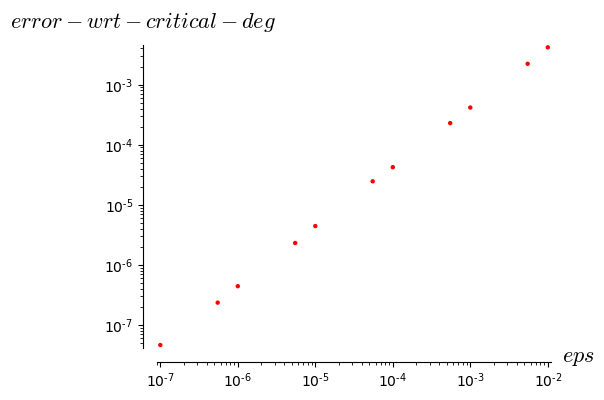

In [56]:
T=[(1e-2,4), (5.5e-3,7), (1e-3,17), (5.5e-4, 21), (1e-4,33), (5.5e-5,37), (1e-5,50), (5.5e-6, 55), (1e-6,68), (5.5e-7, 73),(1e-7,86)]
plot_error_3d_wrt_criticaldeg_and_criticaleps(A, T, color="red")

In [57]:
T=[(1e-2,4), (5.5e-3,7), (1e-3,17), (5.5e-4, 21), (1e-4,33), (5.5e-5,37), (1e-5,50), (5.5e-6, 55), (1e-6,68), (5.5e-7, 73),(1e-7,86)]
line_of_best_fit_for_error(A, T)

Solid angle measure is: 0.03498847667580621
[-2.00000000000000, -2.380262584451624]
[-2.25963731050576, -2.6536631649685365]
[-3.00000000000000, -3.381274619247566]
[-3.25963731050576, -3.6405599133004767]
[-4.00000000000000, -4.3734774220561725]
[-4.25963731050576, -4.608414117663678]
[-5.00000000000000, -5.3528001137610195]
[-5.25963731050576, -5.633402968426947]
[-6.00000000000000, -6.352758488468965]
[-6.25963731050576, -6.626323683162264]
[-7.00000000000000, -7.33145349973162]


[b == -0.40567493197746973, m == 0.99117523328586]

In [58]:
1-min_eigenval_assoc_matrix(A)

0.9190357808957376

In [81]:
solid_angle_3d(A)

0.03498847667580621

In [82]:
min_eigenval_assoc_matrix(A)

0.08096421910426244

In [59]:
D=matrix([[4,-1,1],[0,0,4],[6,1,0]])

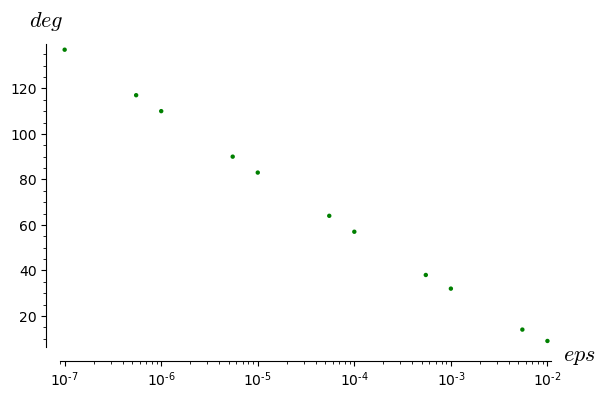

In [60]:
#D log scale
T=[(1e-2,9), (5.5e-3,14), (1e-3,32), (5.5e-4, 38), (1e-4,57), (5.5e-5,64), (1e-5,83), (5.5e-6, 90), (1e-6,110), (5.5e-7, 117),(1e-7,137)]
list_plot_semilogx(T, axes_labels=['$eps$', '$deg$'], color="green") 

In [61]:
T=[(1e-2,9), (5.5e-3,14), (1e-3,32), (5.5e-4, 38), (1e-4,57), (5.5e-5,64), (1e-5,83), (5.5e-6, 90), (1e-6,110), (5.5e-7, 117),(1e-7,137)]
line_of_best_fit_for_eps_deg_pairs(T)

[-2.00000000000000, 2*log(3)/log(10)]
[-2.25963731050576, log(14)/log(10)]
[-3.00000000000000, 5*log(2)/log(10)]
[-3.25963731050576, log(38)/log(10)]
[-4.00000000000000, log(57)/log(10)]
[-4.25963731050576, 6*log(2)/log(10)]
[-5.00000000000000, log(83)/log(10)]
[-5.25963731050576, log(90)/log(10)]
[-6.00000000000000, log(110)/log(10)]
[-6.25963731050576, log(117)/log(10)]
[-7.00000000000000, log(137)/log(10)]


[b == 0.752199175415938, m == -0.21932060986650623]

Solid angle measure is: 0.028680838516835755
9 (0.0100000000000000, 0.00447198688758162)
14 (0.00550000000000000, 0.0025816190600577715)
32 (0.00100000000000000, 0.0004453988224279552)
38 (0.000550000000000000, 0.0002556513667343642)
57 (0.000100000000000000, 4.6032677528007326e-05)
64 (0.0000550000000000000, 2.475187435709708e-05)
83 (0.0000100000000000000, 4.6865027301459805e-06)
90 (5.50000000000000e-6, 2.553024004970511e-06)
110 (1.00000000000000e-6, 4.558968091095128e-07)
117 (5.50000000000000e-7, 2.503781190016374e-07)
137 (1.00000000000000e-7, 4.555811550580047e-08)


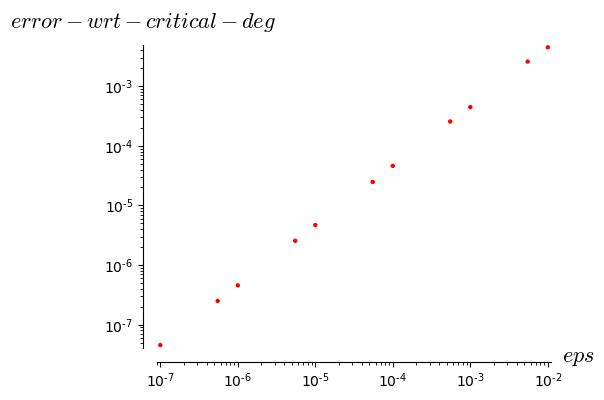

In [62]:
T=[(1e-2,9), (5.5e-3,14), (1e-3,32), (5.5e-4, 38), (1e-4,57), (5.5e-5,64), (1e-5,83), (5.5e-6, 90), (1e-6,110), (5.5e-7, 117),(1e-7,137)]
plot_error_3d_wrt_criticaldeg_and_criticaleps(D, T, color="red")

In [63]:
T=[(1e-2,9), (5.5e-3,14), (1e-3,32), (5.5e-4, 38), (1e-4,57), (5.5e-5,64), (1e-5,83), (5.5e-6, 90), (1e-6,110), (5.5e-7, 117),(1e-7,137)]
line_of_best_fit_for_error(D, T)

Solid angle measure is: 0.028680838516835755
[-2.00000000000000, -2.349499478524874]
[-2.25963731050576, -2.5881078412021687]
[-3.00000000000000, -3.3512509355141877]
[-3.25963731050576, -3.592351881155296]
[-4.00000000000000, -4.336933763280706]
[-4.25963731050576, -4.6063919081598135]
[-5.00000000000000, -5.329151125637184]
[-5.25963731050576, -5.592945101695076]
[-6.00000000000000, -6.341133447479942]
[-6.25963731050576, -6.601403627586482]
[-7.00000000000000, -7.34143424864822]


[b == -0.34070630101474486, m == 0.9996821308022034]

In [64]:
1-min_eigenval_assoc_matrix(D)

0.9218730117808251

In [79]:
solid_angle_3d(D)

0.028680838516835755

In [80]:
min_eigenval_assoc_matrix(D)

0.07812698821917485

In [60]:
E_1=matrix([[1,0,0],[1,7,0],[-1,-1,-1]])
E=list(generate_cones_decomposition(E_1))
E

[(
[ 1  0  0]   
[ 1  7  0]   
[ 0  6 -1], 1
),
 (
[ 1  0  0]   
[-1 -1 -1]   
[ 0  6 -1], 1
)]

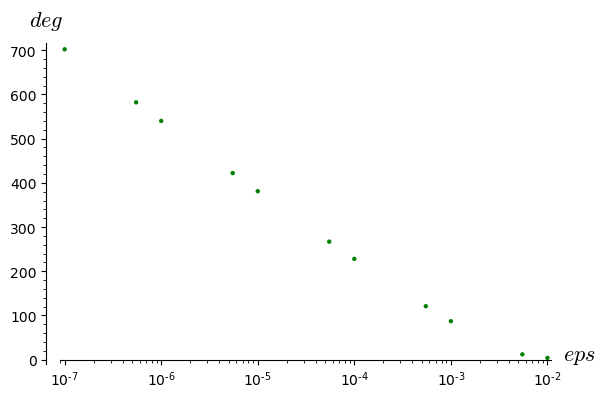

In [66]:
#E[0][0] log scale
T=[(1e-2,4), (5.5e-3,12), (1e-3,87), (5.5e-4, 121), (1e-4,228), (5.5e-5,267), (1e-5,381), (5.5e-6, 422), (1e-6,540), (5.5e-7, 582),(1e-7,702)]
list_plot_semilogx(T, axes_labels=['$eps$', '$deg$'], color="green") 

In [67]:
T=[(1e-2,4), (5.5e-3,12), (1e-3,87), (5.5e-4, 121), (1e-4,228), (5.5e-5,267), (1e-5,381), (5.5e-6, 422), (1e-6,540), (5.5e-7, 582),(1e-7,702)]
line_of_best_fit_for_eps_deg_pairs(T)

[-2.00000000000000, 2*log(2)/log(10)]
[-2.25963731050576, log(12)/log(10)]
[-3.00000000000000, log(87)/log(10)]
[-3.25963731050576, log(121)/log(10)]
[-4.00000000000000, log(228)/log(10)]
[-4.25963731050576, log(267)/log(10)]
[-5.00000000000000, log(381)/log(10)]
[-5.25963731050576, log(422)/log(10)]
[-6.00000000000000, log(540)/log(10)]
[-6.25963731050576, log(582)/log(10)]
[-7.00000000000000, log(702)/log(10)]


[b == 0.4686706139567457, m == -0.3909568415693147]

Solid angle measure is: 0.012206015078361759
4 (0.0100000000000000, 0.004258479715959697)
12 (0.00550000000000000, 0.0026559749302219084)
87 (0.00100000000000000, 0.0004874534303284748)
121 (0.000550000000000000, 0.0002716575262333397)
228 (0.000100000000000000, 4.921606913225324e-05)
267 (0.0000550000000000000, 2.7103215819080165e-05)
381 (0.0000100000000000000, 4.948740620782863e-06)
422 (5.50000000000000e-6, 2.714956395984125e-06)
540 (1.00000000000000e-6, 4.931724021418893e-07)
582 (5.50000000000000e-7, 2.7040226520738675e-07)
702 (1.00000000000000e-7, 4.9200179980460335e-08)


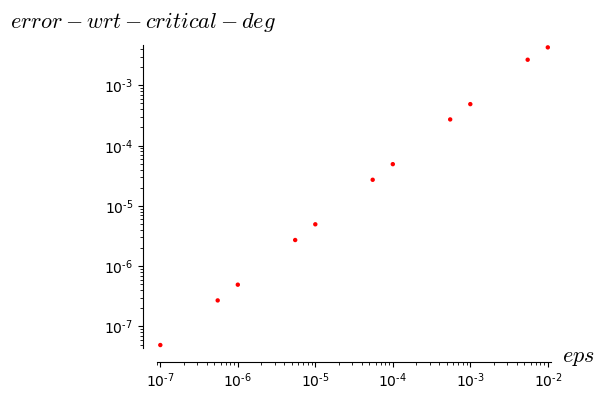

In [68]:
T=[(1e-2,4), (5.5e-3,12), (1e-3,87), (5.5e-4, 121), (1e-4,228), (5.5e-5,267), (1e-5,381), (5.5e-6, 422), (1e-6,540), (5.5e-7, 582),(1e-7,702)]
plot_error_3d_wrt_criticaldeg_and_criticaleps(E[0][0], T, color="red")

In [69]:
T=[(1e-2,4), (5.5e-3,12), (1e-3,87), (5.5e-4, 121), (1e-4,228), (5.5e-5,267), (1e-5,381), (5.5e-6, 422), (1e-6,540), (5.5e-7, 582),(1e-7,702)]
line_of_best_fit_for_error(E[0][0], T)

Solid angle measure is: 0.012206015078361759
[-2.00000000000000, -2.3707454170500815]
[-2.25963731050576, -2.5757760285953117]
[-3.00000000000000, -3.3120668690268773]
[-3.25963731050576, -3.5659782583963913]
[-4.00000000000000, -4.307893076174552]
[-4.25963731050576, -4.566979176667165]
[-5.00000000000000, -5.305505308345797]
[-5.25963731050576, -5.566237141079021]
[-6.00000000000000, -6.307001234454326]
[-6.25963731050576, -6.567989674553819]
[-7.00000000000000, -7.308033308525773]


[b == -0.3419023371733969, m == 0.9936869934307895]

In [70]:
1-min_eigenval_assoc_matrix(E[0][0])

0.9866678840995654

In [77]:
solid_angle_3d(E[0][0])

0.012206015078361759

In [78]:
min_eigenval_assoc_matrix(E[0][0])

0.013332115900434593

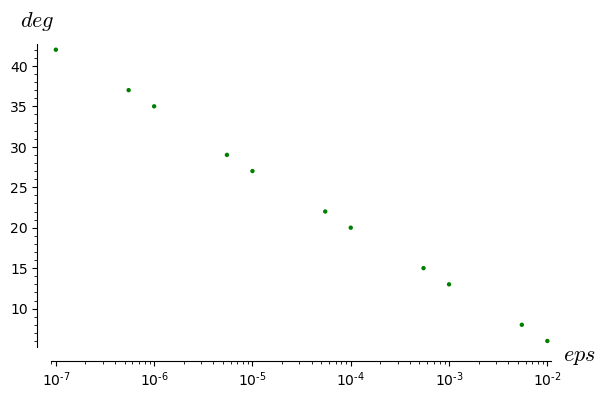

In [71]:
#E[1][0] log scale
T=[(1e-2,6), (5.5e-3,8), (1e-3,13), (5.5e-4, 15), (1e-4,20), (5.5e-5,22), (1e-5,27), (5.5e-6, 29), (1e-6,35), (5.5e-7, 37),(1e-7,42)]
list_plot_semilogx(T, axes_labels=['$eps$', '$deg$'], color="green") 

In [72]:
T=[(1e-2,6), (5.5e-3,8), (1e-3,13), (5.5e-4, 15), (1e-4,20), (5.5e-5,22), (1e-5,27), (5.5e-6, 29), (1e-6,35), (5.5e-7, 37),(1e-7,42)]
line_of_best_fit_for_eps_deg_pairs(T)

[-2.00000000000000, log(6)/log(10)]
[-2.25963731050576, 3*log(2)/log(10)]
[-3.00000000000000, log(13)/log(10)]
[-3.25963731050576, log(15)/log(10)]
[-4.00000000000000, log(20)/log(10)]
[-4.25963731050576, log(22)/log(10)]
[-5.00000000000000, 3*log(3)/log(10)]
[-5.25963731050576, log(29)/log(10)]
[-6.00000000000000, log(35)/log(10)]
[-6.25963731050576, log(37)/log(10)]
[-7.00000000000000, log(42)/log(10)]


[b == 0.5892491512771872, m == -0.16071553065833483]

Solid angle measure is: 0.26241405817413493
6 (0.0100000000000000, 0.021393497064689487)
8 (0.00550000000000000, 0.01094828693868427)
13 (0.00100000000000000, 0.002149976503134421)
15 (0.000550000000000000, 0.0011360915156287121)
20 (0.000100000000000000, 0.00023570462933336644)
22 (0.0000550000000000000, 0.00012648949542559684)
27 (0.0000100000000000000, 2.7011751296102116e-05)
29 (5.50000000000000e-6, 1.4623884661557618e-05)
35 (1.00000000000000e-6, 2.344580557034348e-06)
37 (5.50000000000000e-7, 1.2773260122944663e-06)
42 (1.00000000000000e-7, 2.812275129993047e-07)


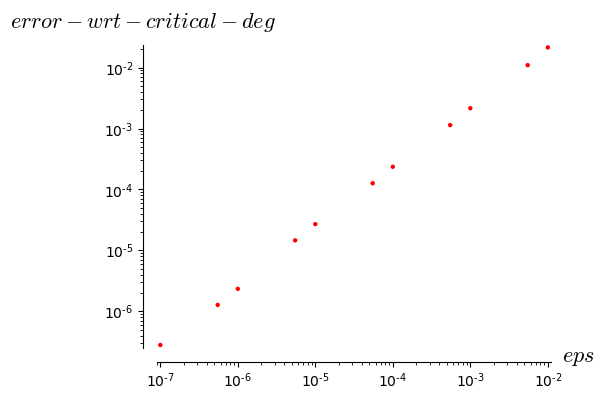

In [73]:
T=[(1e-2,6), (5.5e-3,8), (1e-3,13), (5.5e-4, 15), (1e-4,20), (5.5e-5,22), (1e-5,27), (5.5e-6, 29), (1e-6,35), (5.5e-7, 37),(1e-7,42)]
plot_error_3d_wrt_criticaldeg_and_criticaleps(E[1][0], T, color="red")

In [74]:
T=[(1e-2,6), (5.5e-3,8), (1e-3,13), (5.5e-4, 15), (1e-4,20), (5.5e-5,22), (1e-5,27), (5.5e-6, 29), (1e-6,35), (5.5e-7, 37),(1e-7,42)]
line_of_best_fit_for_error(E[1][0], T)

Solid angle measure is: 0.26241405817413493
[-2.00000000000000, -1.6697182181512467]
[-2.25963731050576, -1.960653828885753]
[-3.00000000000000, -2.6675662864168714]
[-3.25963731050576, -2.9445866834738244]
[-4.00000000000000, -3.6276318876742657]
[-4.25963731050576, -3.897945539848845]
[-5.00000000000000, -4.568447257590524]
[-5.25963731050576, -4.834937246873277]
[-6.00000000000000, -5.629934840820436]
[-6.25963731050576, -5.893698243480086]
[-7.00000000000000, -6.550942193754362]


[b == 0.26602795807097945, m == 0.9766902887365534]

In [75]:
1-min_eigenval_assoc_matrix(E[1][0])

0.7473677532236447

In [76]:
solid_angle_3d(E[1][0])

0.26241405817413493

[-1.00000000000000, 10]
[-1.25963731050576, 17]
[-2.00000000000000, 38]
[-2.25963731050576, 46]
[-3.00000000000000, 68]
[-3.25963731050576, 76]
[-4.00000000000000, 99]
[-4.25963731050576, 107]
[-5.00000000000000, 130]
[-5.25963731050576, 138]
[-6.00000000000000, 162]
[-6.25963731050576, 170]
[-7.00000000000000, 193]
[-7.25963731050576, 202]
[-8.00000000000000, 225]
[-8.25963731050576, 234]
[b == -23.758817817774236, m == -30.983139622985142]


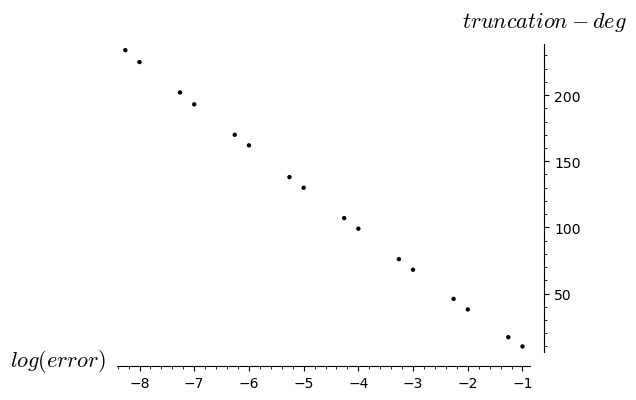

In [46]:
#B
L=[(1e-1,10), (5.5e-2, 17), (1e-2,38), (5.5e-3,46), (1e-3,68), (5.5e-4, 76), (1e-4,99), (5.5e-5,107), (1e-5,130), (5.5e-6, 138), (1e-6,162), (5.5e-7, 170),(1e-7,193), (5.5e-8, 202), (1e-8,225), (5.5e-9, 234)]
line_of_best_fit_deg_delta(L, color="black")

In [50]:
2/(min_eigenval_assoc_matrix(B))

29.711689324879902

[-3.00000000000000, 5]
[-3.25963731050576, 6]
[-4.00000000000000, 10]
[-4.25963731050576, 11]
[-5.00000000000000, 15]
[-5.25963731050576, 16]
[-6.00000000000000, 20]
[-6.25963731050576, 21]
[-7.00000000000000, 25]
[-7.25963731050576, 26]
[-8.00000000000000, 30]
[-8.25963731050576, 32]
[b == -10.44919625024484, m == -5.068108109833345]


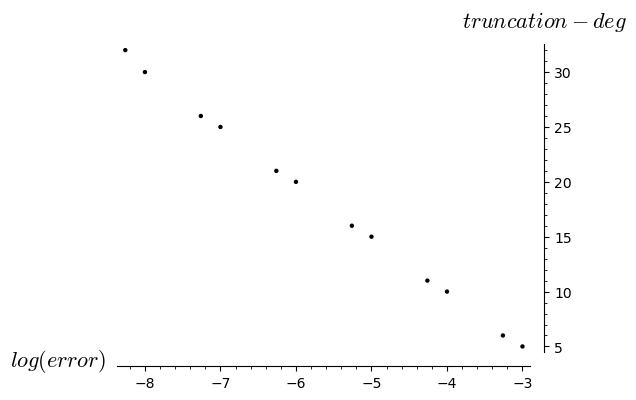

In [88]:
#F
L=[(1e-3,5), (5.5e-4, 6), (1e-4,10), (5.5e-5,11), (1e-5,15), (5.5e-6, 16), (1e-6,20), (5.5e-7, 21),(1e-7,25), (5.5e-8, 26), (1e-8,30), (5.5e-9, 32)]
line_of_best_fit_deg_delta(L, color="black")

In [64]:
2/(min_eigenval_assoc_matrix(F))

7.69233979163893

[-2.00000000000000, 8]
[-2.25963731050576, 10]
[-3.00000000000000, 17]
[-3.25963731050576, 19]
[-4.00000000000000, 27]
[-4.25963731050576, 29]
[-5.00000000000000, 37]
[-5.25963731050576, 40]
[-6.00000000000000, 47]
[-6.25963731050576, 50]
[-7.00000000000000, 58]
[-7.25963731050576, 61]
[-8.00000000000000, 69]
[-8.25963731050576, 71]
[b == -13.6844170181761, m == -10.228457344909893]


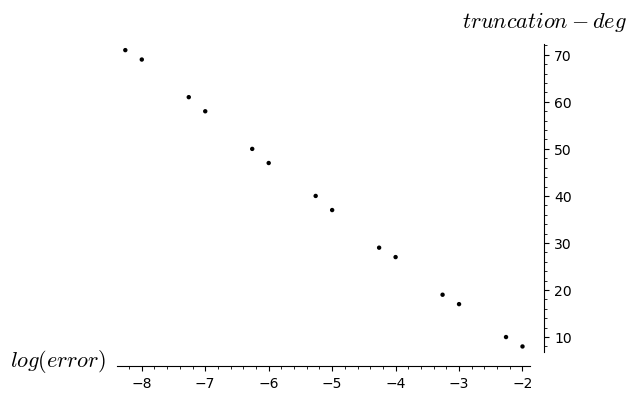

In [87]:
#X
L=[(1e-2,8), (5.5e-3,10), (1e-3,17), (5.5e-4, 19), (1e-4,27), (5.5e-5,29), (1e-5,37), (5.5e-6, 40), (1e-6,47), (5.5e-7, 50),(1e-7,58), (5.5e-8, 61), (1e-8,69), (5.5e-9, 71)]
line_of_best_fit_deg_delta(L, color="black")

In [67]:
2/(min_eigenval_assoc_matrix(X))

12.244400176893839

[-2.25963731050576, 3]
[-3.00000000000000, 12]
[-3.25963731050576, 16]
[-4.00000000000000, 27]
[-4.25963731050576, 32]
[-5.00000000000000, 44]
[-5.25963731050576, 49]
[-6.00000000000000, 62]
[-6.25963731050576, 67]
[-7.00000000000000, 80]
[-7.25963731050576, 85]
[-8.00000000000000, 99]
[-8.25963731050576, 104]
[b == -39.9051487602023, m == -17.170016121080945]


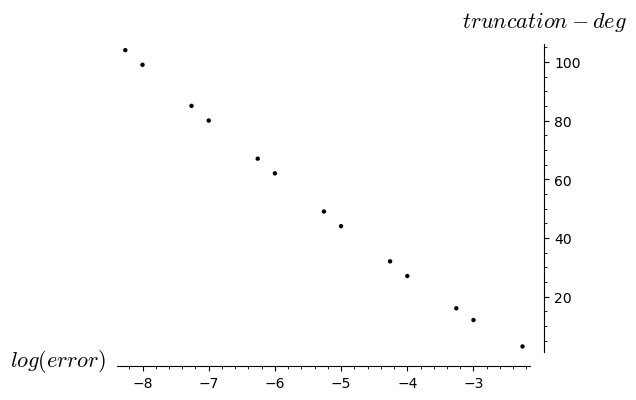

In [86]:
#A
L=[(5.5e-3,3), (1e-3,12), (5.5e-4, 16), (1e-4,27), (5.5e-5,32), (1e-5,44), (5.5e-6, 49), (1e-6,62), (5.5e-7, 67),(1e-7,80), (5.5e-8, 85), (1e-8,99), (5.5e-9, 104)]
line_of_best_fit_deg_delta(L, color="black")

In [68]:
2/(min_eigenval_assoc_matrix(A))

24.702269991939048

[-2.00000000000000, 4]
[-2.25963731050576, 8]
[-3.00000000000000, 24]
[-3.25963731050576, 30]
[-4.00000000000000, 49]
[-4.25963731050576, 56]
[-5.00000000000000, 75]
[-5.25963731050576, 82]
[-6.00000000000000, 101]
[-6.25963731050576, 108]
[-7.00000000000000, 128]
[-7.25963731050576, 135]
[-8.00000000000000, 155]
[-8.25963731050576, 162]
[b == -51.82970705153183, m == -25.656934519989974]


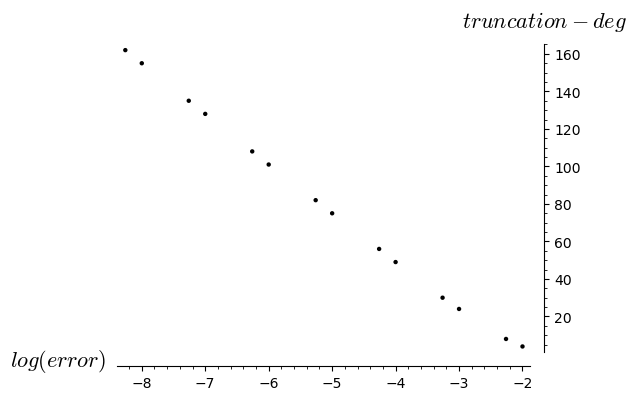

In [69]:
#D
L=[(1e-2,4), (5.5e-3,8), (1e-3,24), (5.5e-4, 30), (1e-4,49), (5.5e-5,56), (1e-5,75), (5.5e-6, 82), (1e-6,101), (5.5e-7, 108),(1e-7,128), (5.5e-8, 135), (1e-8,155), (5.5e-9, 162)]
line_of_best_fit_deg_delta(L, color="black")

In [70]:
2/(min_eigenval_assoc_matrix(D))

25.59934851692051

[-2.25963731050576, 2]
[-3.00000000000000, 49]
[-3.25963731050576, 81]
[-4.00000000000000, 183]
[-4.25963731050576, 221]
[-5.00000000000000, 334]
[-5.25963731050576, 374]
[-6.00000000000000, 491]
[-6.25963731050576, 533]
[-7.00000000000000, 652]
[-7.25963731050576, 695]
[-8.00000000000000, 816]
[-8.25963731050576, 858]
[b == -395.76277008108946, m == -149.445652076489]


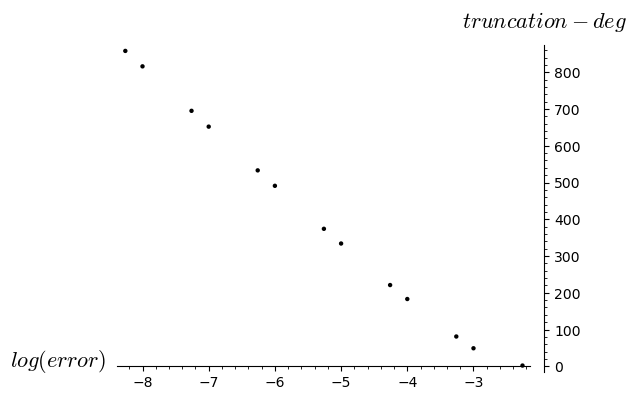

In [71]:
#E[0][0]
L=[(5.5e-3,2), (1e-3,49), (5.5e-4, 81), (1e-4,183), (5.5e-5,221), (1e-5,334), (5.5e-6, 374), (1e-6,491), (5.5e-7, 533),(1e-7,652), (5.5e-8, 695), (1e-8,816), (5.5e-9, 858)]
line_of_best_fit_deg_delta(L, color="black")

In [72]:
2/(min_eigenval_assoc_matrix(E[0][0]))

150.01369737078306

[-1.00000000000000, 2]
[-1.25963731050576, 4]
[-2.00000000000000, 9]
[-2.25963731050576, 11]
[-3.00000000000000, 16]
[-3.25963731050576, 18]
[-4.00000000000000, 23]
[-4.25963731050576, 25]
[-5.00000000000000, 31]
[-5.25963731050576, 33]
[-6.00000000000000, 38]
[-6.25963731050576, 40]
[-7.00000000000000, 46]
[-7.25963731050576, 48]
[-8.00000000000000, 54]
[-8.25963731050576, 56]
[b == -5.967064346437986, m == -7.417583043157478]


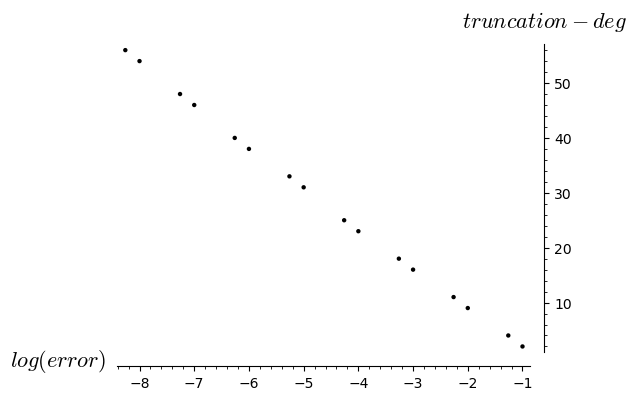

In [73]:
#E[1][0]
L=[(1e-1,2),(5.5e-2,4),(1e-2,9),(5.5e-3,11), (1e-3,16), (5.5e-4, 18), (1e-4,23), (5.5e-5,25), (1e-5,31), (5.5e-6, 33), (1e-6,38), (5.5e-7, 40),(1e-7,46), (5.5e-8, 48), (1e-8,54), (5.5e-9, 56)]
line_of_best_fit_deg_delta(L, color="black")

In [77]:
2/(min_eigenval_assoc_matrix(E[1][0]))

7.916645739094882

[-2.25963731050576, 4]
[-3.00000000000000, 56]
[-3.25963731050576, 84]
[-4.00000000000000, 179]
[-4.25963731050576, 215]
[-5.00000000000000, 322]
[-5.25963731050576, 360]
[-6.00000000000000, 471]
[-6.25963731050576, 511]
[-7.00000000000000, 625]
[-7.25963731050576, 665]
[-8.00000000000000, 780]
[-8.25963731050576, 821]
[b == -370.2406606450104, m == -141.88611877855433]


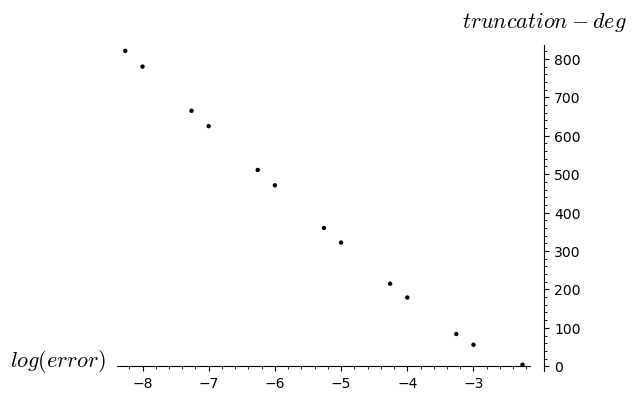

In [78]:
#C[0][0]
L=[(5.5e-3,4), (1e-3,56), (5.5e-4, 84), (1e-4,179), (5.5e-5,215), (1e-5,322), (5.5e-6, 360), (1e-6,471), (5.5e-7, 511),(1e-7,625), (5.5e-8, 665), (1e-8,780), (5.5e-9, 821)]
line_of_best_fit_deg_delta(L, color="black")

In [79]:
2/(min_eigenval_assoc_matrix(C[0][0]))

142.99295739719554

[-1.00000000000000, 8]
[-1.25963731050576, 13]
[-2.00000000000000, 29]
[-2.25963731050576, 35]
[-3.00000000000000, 52]
[-3.25963731050576, 58]
[-4.00000000000000, 75]
[-4.25963731050576, 82]
[-5.00000000000000, 99]
[-5.25963731050576, 106]
[-6.00000000000000, 123]
[-6.25963731050576, 130]
[-7.00000000000000, 148]
[-7.25963731050576, 154]
[-8.00000000000000, 172]
[-8.25963731050576, 179]
[b == -18.175482828098417, m == -23.67543763376871]


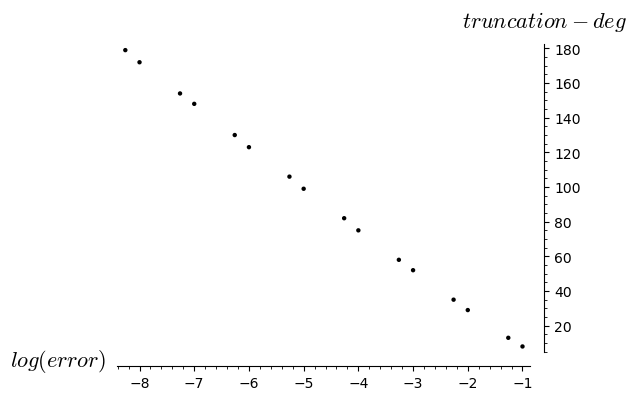

In [80]:
#C[1][0]
L=[(1e-1, 8), (5.5e-2, 13), (1e-2,29), (5.5e-3,35), (1e-3,52), (5.5e-4, 58), (1e-4,75), (5.5e-5,82), (1e-5,99), (5.5e-6, 106), (1e-6,123), (5.5e-7, 130),(1e-7,148), (5.5e-8, 154), (1e-8,172), (5.5e-9, 179)]
line_of_best_fit_deg_delta(L, color="black")

In [81]:
2/(min_eigenval_assoc_matrix(C[1][0]))

22.954451150103335

[-1.00000000000000, 4]
[-1.25963731050576, 12]
[-2.00000000000000, 42]
[-2.25963731050576, 54]
[-3.00000000000000, 91]
[-3.25963731050576, 104]
[-4.00000000000000, 143]
[-4.25963731050576, 157]
[-5.00000000000000, 197]
[-5.25963731050576, 211]
[-6.00000000000000, 252]
[-6.25963731050576, 266]
[-7.00000000000000, 308]
[-7.25963731050576, 322]
[-8.00000000000000, 364]
[-8.25963731050576, 379]
[b == -61.84400193111578, m == -52.58715731384037]


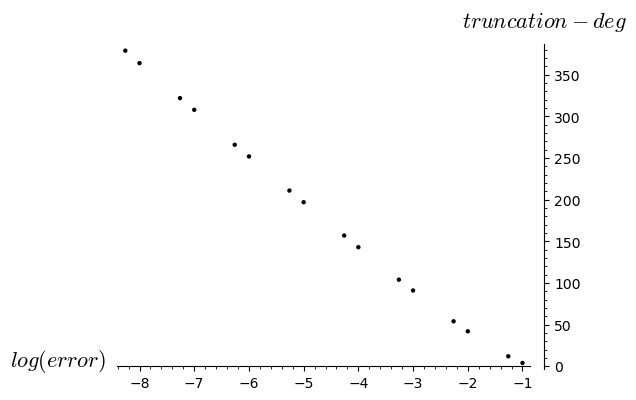

In [82]:
#Z[0][0]
L=[(1e-1, 4), (5.5e-2, 12), (1e-2,42), (5.5e-3,54), (1e-3,91), (5.5e-4, 104), (1e-4,143), (5.5e-5,157), (1e-5,197), (5.5e-6, 211), (1e-6,252), (5.5e-7, 266),(1e-7,308), (5.5e-8, 322), (1e-8,364), (5.5e-9, 379)]
line_of_best_fit_deg_delta(L, color="black")

In [85]:
2/(min_eigenval_assoc_matrix(Z[0][0]))

59.462895133782794

[-1.00000000000000, 23]
[-1.25963731050576, 37]
[-2.00000000000000, 82]
[-2.25963731050576, 98]
[-3.00000000000000, 145]
[-3.25963731050576, 162]
[-4.00000000000000, 210]
[-4.25963731050576, 228]
[-5.00000000000000, 277]
[-5.25963731050576, 294]
[-6.00000000000000, 344]
[-6.25963731050576, 361]
[-7.00000000000000, 412]
[-7.25963731050576, 429]
[-8.00000000000000, 480]
[-8.25963731050576, 497]
[b == -49.58497100064433, m == -65.77416821129623]


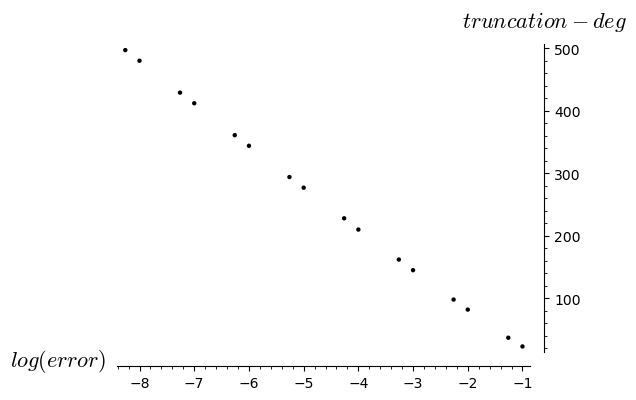

In [83]:
#Z[1][0]
L=[(1e-1, 23), (5.5e-2, 37), (1e-2,82), (5.5e-3,98), (1e-3,145), (5.5e-4, 162), (1e-4,210), (5.5e-5,228), (1e-5,277), (5.5e-6, 294), (1e-6,344), (5.5e-7, 361),(1e-7,412), (5.5e-8, 429), (1e-8,480), (5.5e-9, 497)]
line_of_best_fit_deg_delta(L, color="black")

In [84]:
2/(min_eigenval_assoc_matrix(Z[1][0]))

61.98360214935177

In [27]:
def trunc_deg(A, delta=1e-6):
    lambda_min=min_eigenval_assoc_matrix(A)
    a=(2*log(delta, 10))/lambda_min
    b=(2*log(delta, 10))/lambda_min
    D = ceil((2*log(delta, 10))/lambda_min)
    return D

In [30]:
trunc_deg(E[1][0], delta=1e-7)

-55

In [31]:
trunc_deg(E[1][0], delta=1e-6)

-47

In [32]:
trunc_deg(E[0][0], delta=1e-6)

-900

In [33]:
trunc_deg(E[0][0], delta=1e-4)

-600

In [34]:
trunc_deg(E[0][0], delta=1e-1)

-150